# Desafio 7 - Marcelo França Júnior

RID: #143970

## Introdução

Você deverá utilizar um modelo de Clustering para criar um sistema de agrupamento de perfis de clientes para um e-commerce. Deverá analisar o modelo mais eficiente, capaz de tornar as análises mais simplificadas para a empresa.

Você foi contratado por uma empresa de e-commerce que está buscando entender melhor o comportamento de seus clientes para personalizar as suas campanhas de marketing. Para isso, a empresa disponibilizou uma base de dados em csv contendo dados sobre clientes, produtos e transações da loja realizadas entre os anos de 2010 e2011.
Com base nesses dados, você precisa agrupar os clientes em clusters com base em
seu comportamento de compra. Isso irá permitir identificar padrões e características em comum entre os clientes, como:

*   Clientes que compram os mesmos produtos;
*   Clientes que possuem a mesma frequência de compras;
*   Clientes que gastam mais dinheiro em suas compras.

A partir desses clusters, gere insights para que a empresa possa segmentar melhor a sua base de clientes e personalizar as suas campanhas de marketing, direcionando promoções e ofertas aos clientes com base no comportamento de compras.

## Sobre os dados
Acesse os dados aqui: https://www.kaggle.com/datasets/carrie1/ecommerce-data.
Os dados fornecidos possuem informações de transações de compras de uma loja de e-commerce em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.

# Etapa 01 - Análise exploratória dos dados

1. Carregue a base de dados.
2. Realize uma descrição estatística dos dados.
3. Visualize as distribuições e identifique a relevância das colunas para a análise.
4. Verifique a presença de dados nulos, duplicados, outliers e demais inconsistências nos dados.

In [87]:
# Instalação da biblioteca Sidetable
%%capture
%pip install sidetable

In [88]:
# Declaração das bibliotecas utilizadas no Desafio

import numpy as np
import pandas as pd
import sidetable

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, scale, PowerTransformer

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from yellowbrick.cluster import kelbow_visualizer

import warnings
warnings.filterwarnings("ignore")

In [89]:
#Lendo os dados do AWS S3 em formato CSV

df = pd.read_csv("https://www.notion.so/signed/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F7c207e3f-d962-4cdb-bc6b-f49ed41f77e4%2Fdata.csv?table=block&id=f44f0180-d4c9-4f47-89c9-ee2a263a6169&spaceId=6a055055-52ec-4ebb-a697-63027c951344&userId=c0845f00-59fb-4a0f-bb4a-c1e2314cd202&cache=v2",encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Sobre os Dados:**

**InvoiceNo** - Identificação da transação

**StockCode** - Código de estoque do produto

**Description** - Descrição do produto

**Quantity** - Quantidade de produtos por transação

**InvoiceDate** - Data da transação

**UnitPrice** - Preço unitário do produto

**CustomerID** - Identificação do cliente

**Country** - País de origem da transação

In [90]:
#Informações gerais do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [91]:
# Descrição analítica dos dados numéricos

df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [92]:
# Quantidade de dados únicos por coluna

df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [93]:
# Verificação da quantidade de dados nulos por coluna

df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


In [94]:
# Verificação da quantidade de linhas duplicadas

df.duplicated().sum()

5268

<Axes: >

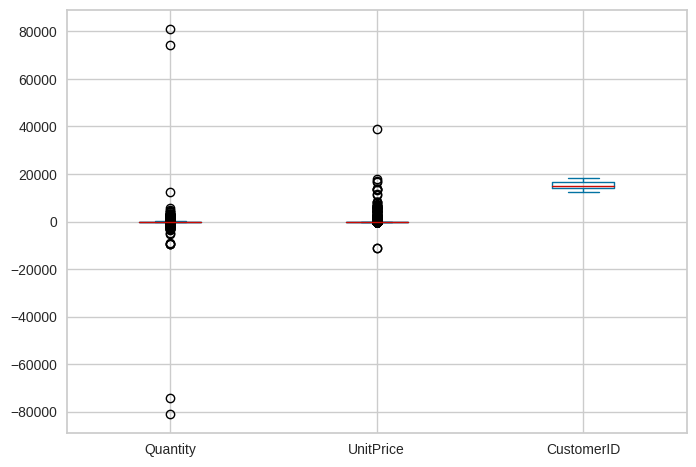

In [95]:
# Verificação visual de outliers

df.plot.box()

# Etapa 02 - Pré-processamento dos dados
1. Realize a normalização dos dados.
2. Faça uma seleção das variáveis mais relevantes para o modelo.
3. Remova os dados nulos, duplicados, outliers e inconsistentes.


In [96]:
# Descarte das linhas com dados nulos

df.dropna(inplace = True)

In [97]:
# Verificação da quantidade de dados nulos por coluna, após o drop

df.stb.missing()

,missing,total,percent
InvoiceNo,0,406829,0.0
StockCode,0,406829,0.0
Description,0,406829,0.0
Quantity,0,406829,0.0
InvoiceDate,0,406829,0.0
UnitPrice,0,406829,0.0
CustomerID,0,406829,0.0
Country,0,406829,0.0


In [98]:
# Descarte das linhas duplicadas

df.drop_duplicates(inplace=True)

In [99]:
# Verificação da quantidade de linhas duplicadas, após o drop

df.duplicated().sum()

0

In [100]:
# Descarte das colunas 'Description' e 'Country', já que elas não contém valor para o modelo

df.drop(['Description', 'Country'], axis=1, inplace=True)

In [101]:
# Mudança do tipo da coluna 'CustomerID' de object para int

df['CustomerID'] = df['CustomerID'].astype(int)

In [102]:
# Mudança do tipo da coluna 'InvoiceDate' de object para datetime

df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [103]:
# Verificação das mudanças realizadas

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Quantity     401604 non-null  int64         
 3   InvoiceDate  401604 non-null  datetime64[ns]
 4   UnitPrice    401604 non-null  float64       
 5   CustomerID   401604 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 21.4+ MB


In [104]:
# Verificação que o dataframe contém valores de quanitdades negativas.

df.query('Quantity < 0')

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,-1,2010-12-01 09:41:00,27.50,14527
154,C536383,35004C,-1,2010-12-01 09:49:00,4.65,15311
235,C536391,22556,-12,2010-12-01 10:24:00,1.65,17548
236,C536391,21984,-24,2010-12-01 10:24:00,0.29,17548
237,C536391,21983,-24,2010-12-01 10:24:00,0.29,17548
...,...,...,...,...,...,...
540449,C581490,23144,-11,2011-12-09 09:57:00,0.83,14397
541541,C581499,M,-1,2011-12-09 10:28:00,224.69,15498
541715,C581568,21258,-5,2011-12-09 11:57:00,10.95,15311
541716,C581569,84978,-1,2011-12-09 11:58:00,1.25,17315


In [105]:
# Realização da operação de módulo sobre a coluna 'Quantity'

df['Quantity'] = abs(df['Quantity'])

In [106]:
# Descartando 5% maiores valores em 'Quantity' e 'UnitPrice', afim de retirar os outliers

df = df[(df['Quantity'] < df['Quantity'].quantile(0.95)) & (df['UnitPrice'] < df['UnitPrice'].quantile(0.95))]

In [107]:
# Criação da coluna 'TotalPrice', sendo o produto da quantidade por valor unitário do produto

df['TotalPrice'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,20.34


<Axes: >

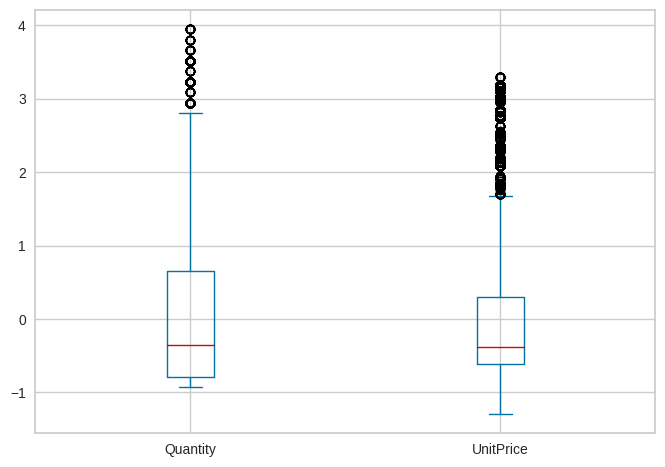

In [108]:
# Verificando os outliers após a filtragem

df[['Quantity','UnitPrice']].apply(scale).plot.box()

# Etapa 03 - Selecione um algoritmo de clusterização
1. Escolha um algoritmo adequado para base de dados, como o K0Means, DBSCAN,
Hierarquia ou Mean Shift
2. Encontre a quantidade ideal de clusters através dos métodos de Elbow ou
Silhouette Score
3. Implemente o algoritmo escolhido

In [109]:
# Data da última com pra registrada

df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [110]:
'''
Criação do RFM

R - Tempo, em dias, da última compra pelo usuário ('CustomerID').
F - Quantidade total de compras realizadas pelo usuário.
M - Preço médio das compras realizadas pelo usuário.

'''

df_rfm = (
  df.groupby('CustomerID')
  .agg(
      R = ('InvoiceDate', lambda x: (df['InvoiceDate'].max() - x.max()).days),
      F = ('InvoiceNo', 'nunique'),
      M = ('TotalPrice', 'mean')
  )
)

In [111]:
df_rfm.describe()

,R,F,M
count,4237.000000,4237.000000,4237.000000
mean,90.988907,4.693887,17.263921
std,100.639737,8.418974,13.019278
min,0.000000,1.000000,0.000000
25%,16.000000,1.000000,9.946575
50%,49.000000,2.000000,16.031250
75%,143.000000,5.000000,19.740000
max,373.000000,235.000000,229.500000


<Axes: >

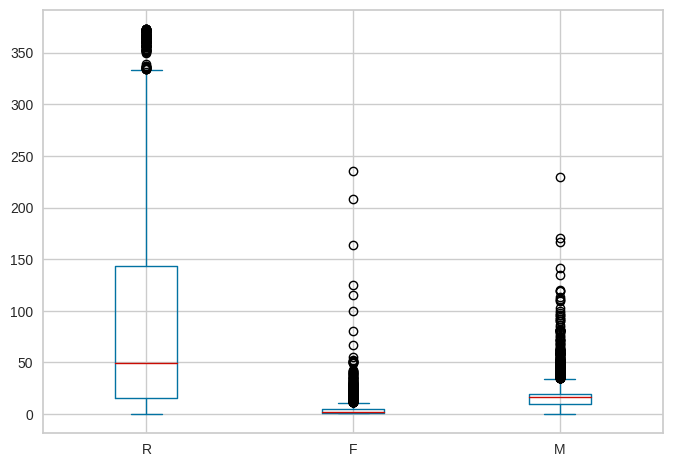

In [112]:
# Visualização dos outliers do dataframe RFM

df_rfm.plot.box()

In [113]:
# Padronização dos dados utilizando o PowerTransformer

scaler = PowerTransformer()
df_rfm_scaled = pd.DataFrame(scaler.fit_transform(df_rfm), index=df_rfm.index, columns=df_rfm.columns)

<Axes: >

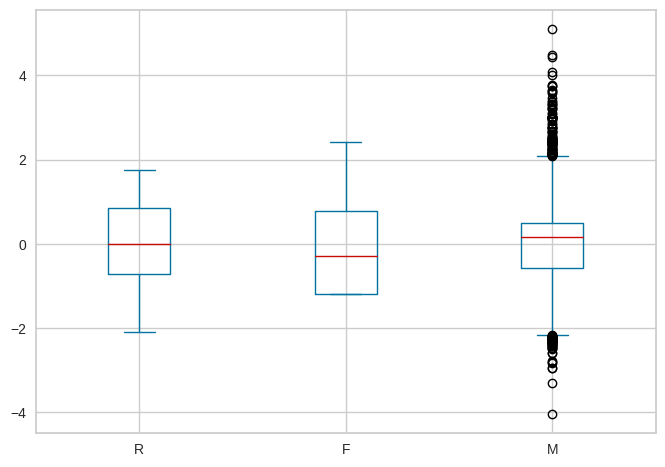

In [114]:
# Podemos notar ainda a presença de outliers

df_rfm_scaled.plot.box()

In [115]:
# Descartando 5% maiores valores em 'M', afim de retirar os outliers

df_rfm_scaled_clip = df_rfm.apply(lambda x: x.clip(upper=x.quantile(.95)))

In [116]:
# Novamente a padronização dos dados, após a aplicação do filtro em 'M'

df_rfm_scaled_clip = pd.DataFrame(scaler.fit_transform(df_rfm_scaled_clip), index=df_rfm.index, columns=df_rfm.columns)

<Axes: >

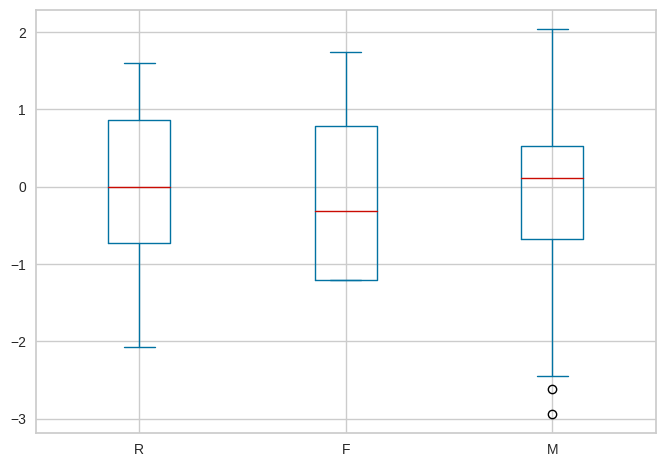

In [117]:
# Não existe mais nenhum outlier significativo

df_rfm_scaled_clip.plot.box()

## KMeans

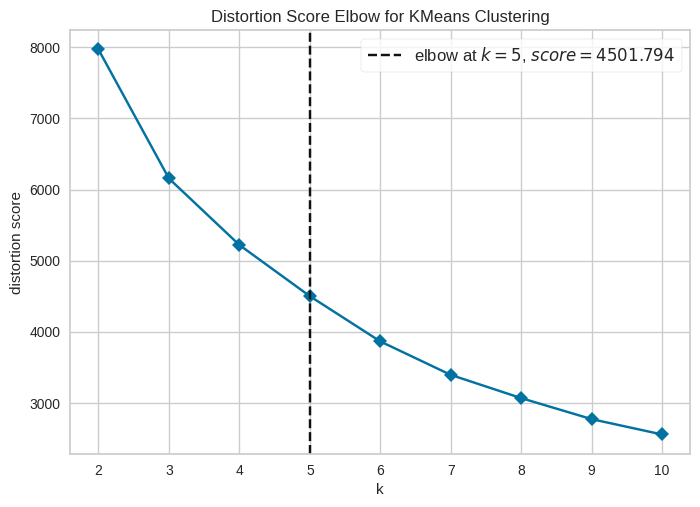

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [118]:
# Utilização do método Elbow para a verificação do desempenho do KMeans com diferentes números de clusters

kelbow_visualizer(KMeans(), df_rfm_scaled_clip, k=10, timings=False)

In [119]:
# Verificação das métricas Inércia, Silhouette, Davies Bouldin e Calinski Harabasz

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_scaled_clip.copy()

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,7968.686040,0.333223,1.194590,2520.328642
3,6155.735688,0.318695,1.126634,2254.434079
4,5221.516039,0.281924,1.181686,2023.883524
5,4501.717353,0.275025,1.158573,1929.367697
6,3866.029369,0.291367,1.080743,1936.005924
7,3395.543494,0.302782,0.991921,1934.130216
8,3068.959639,0.303564,1.003334,1898.094176
9,2770.912478,0.308227,1.002020,1895.891753
10,2552.616697,0.306580,0.985121,1869.147174


In [120]:
# Após a verificação da tabela acima, 7 clusters foi o que performou melhor, na média, dos scores

kmeans = KMeans(7)
kmeans_labels = kmeans.fit_predict(df_rfm_scaled_clip)

In [121]:
# Visualização em 3D dos dados, com as suas divisões por clusters

px.scatter_3d(df_rfm_scaled_clip, x='R', y='F', z='M', color=kmeans_labels.astype(str), template='plotly_dark')

## Hierarquia

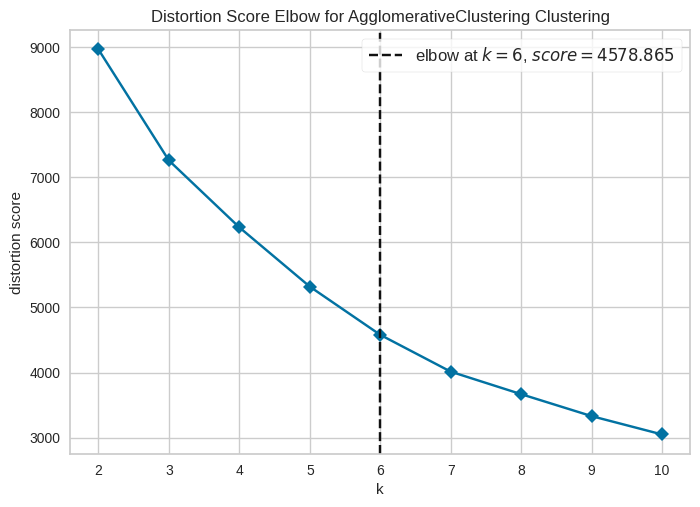

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=AgglomerativeClustering(n_clusters=10),
                 timings=False)

In [122]:
# Utilização do método Elbow para a verificação do desempenho da Hierarquia com diferentes números de clusters

kelbow_visualizer(AgglomerativeClustering(), df_rfm_scaled_clip, k=10, timings=False)

In [123]:
# Verificação das métricas Silhouette, Davies Bouldin e Calinski Harabasz

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []
X = df_rfm_scaled_clip.copy()

for k in range(2,11):
  model = AgglomerativeClustering(n_clusters=k)
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k}
  # cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,
2,0.272306,1.402736,1772.287998
3,0.248209,1.228408,1591.319877
4,0.224090,1.237160,1468.299263
5,0.233933,1.295243,1470.150628
6,0.232575,1.246270,1502.864499
7,0.235381,1.146379,1527.767171
8,0.244370,1.150333,1489.492570
9,0.254677,1.111226,1488.359778
10,0.238110,1.143731,1488.210618


In [124]:
# Após a verificação da tabela acima, 9 clusters foi o que performou melhor, na média, dos scores

hclust = AgglomerativeClustering(n_clusters=9)
hclust_labels = hclust.fit_predict(df_rfm_scaled_clip)

In [125]:
# Visualização em 3D dos dados, com as suas divisões por clusters

px.scatter_3d(df_rfm_scaled_clip, x='R', y='F', z='M', color=hclust_labels.astype(str), template='plotly_dark')

# Etapa 04 - Analise os clusters obtidos
1. Identifique os padrões e características em comum entre os clientes
2. Plote gráficos para auxiliar na análise

In [129]:
# Utilizando os resultados do KMeans

centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_rfm_scaled_clip.columns)

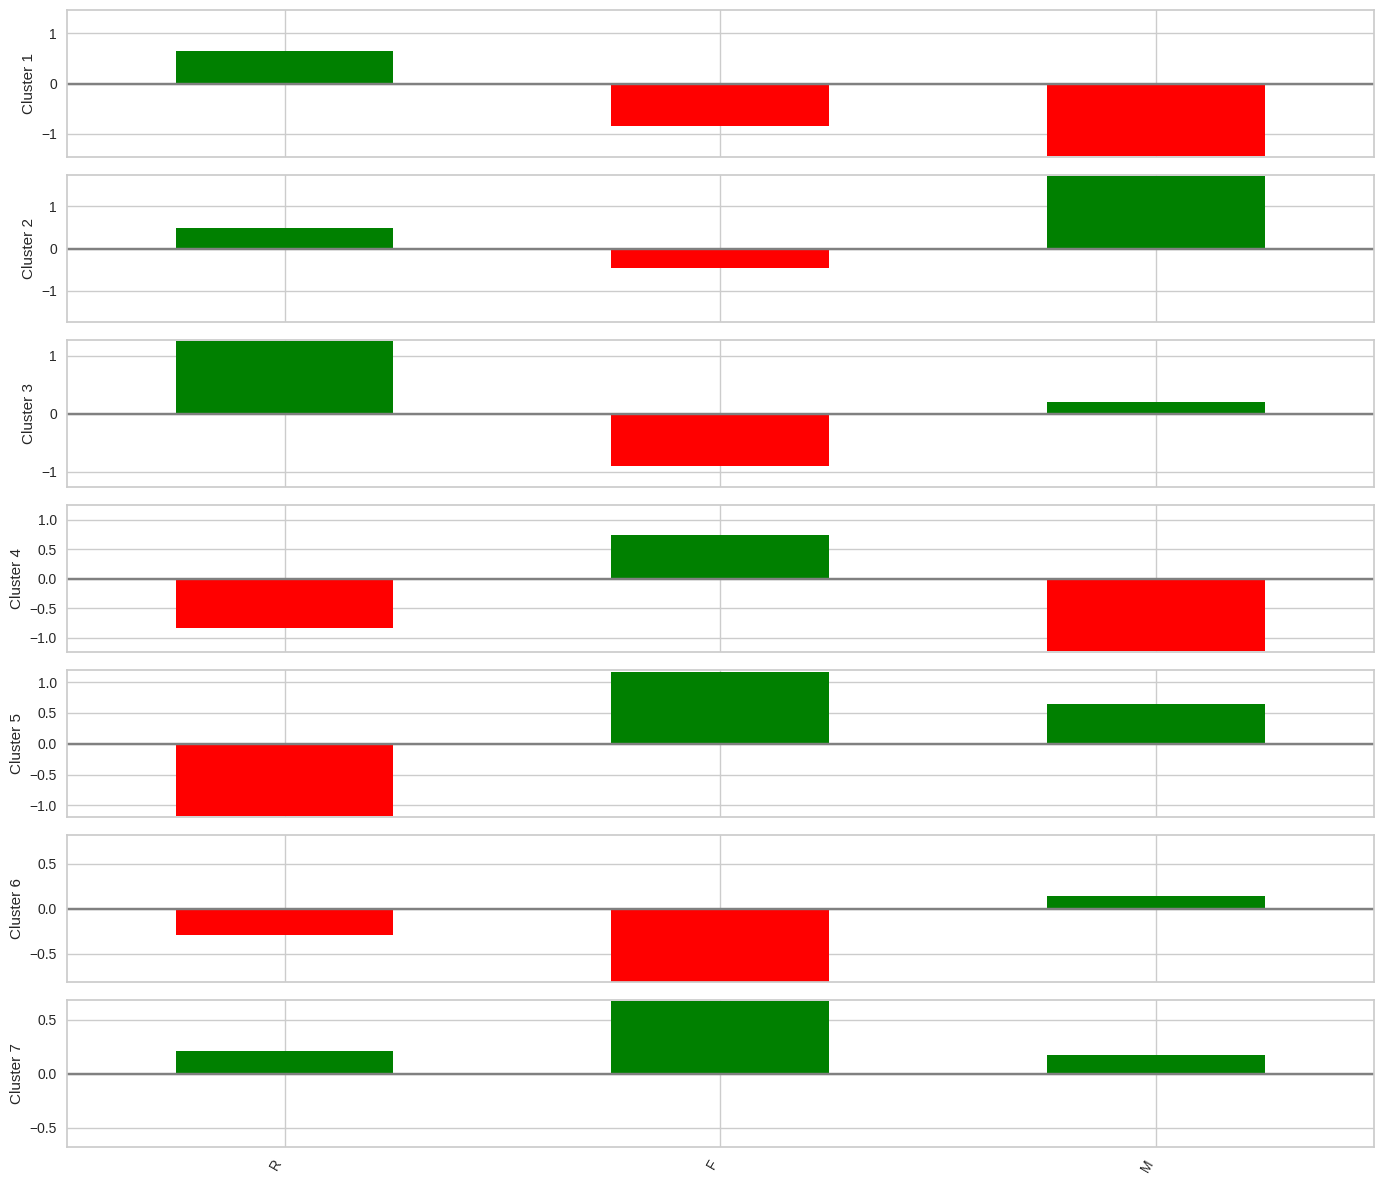

In [130]:
# Plotando gráficos de barras para compreender a divisão de R, F e M pelos diferentes clusters

fig,axes = plt.subplots(nrows=7, figsize=(14,12), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [133]:
# Quantidade de itens em cada cluster

pd.DataFrame(kmeans_labels, columns = ['labels']).value_counts()

labels
4         754
6         715
2         706
5         658
3         539
0         526
1         339
Name: count, dtype: int64

# Etapa 05 - Interpretação dos resultados obtidos
1. Descreva o perfil de compras dos clientes de cada cluster.
2. Justifique como essa análise pode ser útil para empresa para segmentação de seus clientes e personalização das campanhas de marketing.
3. Sugira ações possíveis com base nas ações realizadas.


**Características de clientes por cluster:**

1.   Clientes que não compram faz um tempo, possuem frequência baixa de compra e não gastam muito.
2.   Clientes que não compram faz um tempo, possuem frequência baixa de compra, porém tem um gasto alto em cada compra.
3.   Clientes que não compram faz um tempo, possuem frequência baixa de compra, porém tem um gasto significante em cada compra.
4.   Clientes que compraram faz pouco tempo, possuem frequência alta de compra, porém gastam pouco em cada compra.
5.   Clientes que compraram faz pouco tempo, possuem frequência alta de compra e gastam acima da média em cada compra.
6.   Clientes que compraram faz pouco tempo, possuem frequência baixa de compra e gastam acima da média em cada compra.
7.   Clientes que compraram faz um tempo, possuem frequência alta de compra e gastam acima da média em cada compra.

Melhor tipo de cliente é o 5 e o pior é o 1.


Para cada tipo de cliente, o marketing vai poder realizar diversas campanhas, como atração, com cupons, dos clientes que não compram faz um tempo ou descontos para mais produtos no carrinho para os clientes que gastam pouco.

**Ações para cada tipo de cliente:**

1.   Campanhas online para a atração de novos e antigos clientes.
2.   Envio de campanhas por WhatsApp ou E-Mail com produtos compatíveis aos já comprados.
3.   Envio de campanhas por WhatsApp ou E-Mail com produtos compatíveis aos já comprados.
4.   Promoções de quantidade, fazendo com que o cliente leve mais produtos na mesma compra.
5.   Melhor cliente, fazer planos de fidelidade, para manter o cliente na plataforma.
6.   Possíveis melhores clientes, provável primeira compra, fazer planos de fidelidade.
7.   Envio de campanhas por WhatsApp ou E-Mail com produtos compatíveis aos já comprados.